In [1]:
% matplotlib inline

import h5py as hp
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
import seawater as sw
from mpl_toolkits.basemap import Basemap, cm

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import location data for cruise track and stations
cfname = '/Volumes/sclayton/kuroshio/genomics/ostreo.mat'
f = hp.File(cfname)

lon = np.array(f['lon'])
S = np.array(f['S'])
T = np.array(f['T'])
ostreo = np.array(f['ostreo'])
z = np.array(f['z'])

kuro = np.where(np.logical_or(np.logical_and(lon > 140,T>18.1),T<16))


In [3]:
# calculate density
SS = np.arange(33,36,0.1)
SS = np.tile(SS,(150,1))
print SS.shape
TT = np.arange(13, 28, 0.1)
TT = np.tile(TT, (30,1)).transpose()
print TT.shape
den = sw.dens0(SS, TT)-1000


(150, 30)
(150, 30)


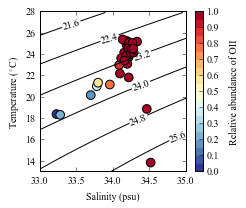

In [10]:
# make a plot of the data
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

fig4 = plt.figure(4, figsize=(3.5, 3), dpi = 600)
palette = plt.get_cmap('RdYlBu_r',20)

plt.xlim([33, 35])
plt.ylim([13, 28])
plt.xlabel('Salinity (psu)', fontsize=10)
plt.ylabel(r'Temperature ($^{\circ}$C)', fontsize=10)
cs = plt.contour(SS, TT, den, [21.6, 22.4, 23.2, 24.0, 24.8, 25.6], colors='k')

plt.clabel(cs, inline=1, fontsize=10, fmt='%3.1f') 

plt.tick_params(axis='both', which='major', labelsize=10)
im = plt.scatter(S[kuro], T[kuro],s=75,c=ostreo[kuro]/100,vmin = 0, vmax = 1, cmap=palette, alpha = 1.)

cb = plt.colorbar(im)
cb.set_label(label=r'Relative abundance of OII',fontsize=10, labelpad = 10) 

plt.show()

fig4.savefig('/Users/sclayton/Desktop/LO_fig4_smtxt.tiff', format='tiff', dpi=600)

In [7]:
print den

[[ 24.84381958  24.92123973  24.99866345 ...,  26.93544249  27.01296211
   27.09048553]
 [ 24.82405847  24.90145903  24.97886316 ...,  26.91515511  26.99265534
   27.07015938]
 [ 24.80420046  24.8815815   24.95896613 ...,  26.89477272  26.97225364
   27.04973837]
 ..., 
 [ 20.98846984  21.06362384  21.13878207 ...,  23.0191387   23.0944099
   23.16968554]
 [ 20.95621042  21.03135239  21.10649861 ...,  22.98655515  23.06181435
   23.13707801]
 [ 20.92387562  20.99900562  21.07413985 ...,  22.95389719  23.02914445
   23.10439616]]
